# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts: 
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions. 

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset). 

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from scipy.stats import t
from scipy.stats import norm
import scipy.stats as stats
from numpy.random import seed
medical = pd.read_csv(r"C:\Users\brian\Desktop\Springboard\Frequentist Case Study\insurance2.csv")

In [2]:
medical.shape

(1338, 8)

In [3]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The mean and standard deviation can provide a general idea of the distribution of the data and the spread of the values. If the data is heavily skewed or has outliers, these statistics may not always be appropriate. The histogram helps visualize the distribution of the data and identify any skewness or outliers. The histogram looks like it is skewed to the left indicating a frequent amount of charges on the lower range.

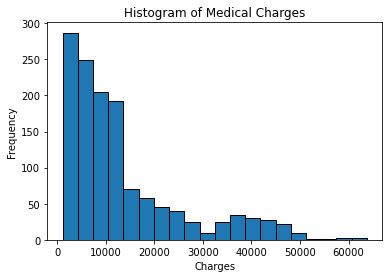

In [4]:
_= plt.hist(medical['charges'], bins=20, edgecolor='black')
_= plt.xlabel('Charges')
_= plt.ylabel('Frequency')
_= plt.title('Histogram of Medical Charges')
_= plt.show()

In [5]:
mean_charge = np.mean(medical['charges'])
mean_charge

13270.422265141257

In [6]:
std_charge = np.std(medical['charges'],ddof=1)
std_charge

12110.011236693994

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

In [7]:
mean_charge + std_charge


25380.43350183525

In [8]:
mean_charge - std_charge

1160.4110284472627

__A:__ I would say that the current information we have is not adequate for answering that question.  The histogram of the sample is skewed and leans toward cheaper charges.  I would suggest hypothesis testing where the null would be that the actual average is greater than or equal to 12,000 and the alternative is less than or equal to 12,000.  A t-test would be what I suggest.

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ A one sided lower confidence interval is what I would use: it only covers values greater than a specified value and provides an estimate of the lower part of the population mean. The lower bound of the confidence interval is 11455 and is below 12,000. This supports the non-null hypothesis. The administrators concern about the charges mean being below 12,000 is reasonable.

In [9]:
medical['charges'].count()

1338

In [10]:
# degrees of freedom = sample size - 1.
degrees_of_freedom = 1337
# alpha is the significance level (0.05), 1 minus the confidence level (1 - 0.95 = 0.05)
alpha = 0.05
# for a one-sided lower confidence interval, you do not 1-alpha and do not divide 2
t_value = t.ppf(alpha, degrees_of_freedom)

In [11]:
# the t_value has a negative for a one-sided lower confidence 
margin_of_error_t = -t_value * std_charge / np.sqrt(1338)
margin_of_error_t

544.9350813250253

In [12]:
con_inv = (12000 - margin_of_error_t)
con_inv

11455.064918674974

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*). 

What assumption about the variances of the two groups are we making here?

__A:__ The null hypothesis is that the average amount charged to both groups (insurance/ no-insurance) is the same. The alternative hypothesis says that the average amount charged is different for both groups.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ I got the same results on both t-tests and not exact on the p-values.  t= -13.298, p-value = 1.110.  This t-stat is negative and really large and the p-value is small by comparison.  This means there is strong evidence against the null hypothesis and the mean charges of the insured and not insured are significantly different from each other. 


In [21]:
claim_0 = medical[medical['insuranceclaim'] == 0] 
claim_1 = medical[medical['insuranceclaim'] == 1] 

char_cl0 = claim_0['charges']
char_cl1 = claim_1['charges']

n_0 = char_cl0.count()
n_1 = char_cl1.count()

mean_0 = np.mean(char_cl0)
mean_1 = np.mean(char_cl1)

std_0 = np.std(char_cl0, ddof=1)
std_1 = np.std(char_cl1, ddof=1)

var_0 = np.sum((char_cl0 - mean_0)**2) / (n_0 - 1)
var_1 = np.sum((char_cl1 - mean_1)**2) / (n_1 - 1)

print('count 0:',n_0, 'count 1:', n_1)
print('mean 0:',mean_0, 'mean 1:', mean_1)
print('std_0:', std_0, 'std_1:', std_1)
print('var_0:', var_0, 'var_1:', var_1)

count 0: 555 count 1: 783
mean 0: 8821.421892306294 mean 1: 16423.928276537663
std_0: 6446.510126811736 std_1: 14045.928418802127
var_0: 41557492.8150863 var_1: 197288105.1461134


In [32]:
# standard error of the difference between means --manually
t_val = (mean_0 - mean_1) / math.sqrt(var_0/n_0 + var_1/n_1)
print('Manual t value: ',t_val)

Manual t value:  -13.298031957975642


In [30]:
df = (std_0**2 / n_0 + std_1**2 / n_1)**2 / ( (std_0**2 / n_0)**2 / (n_0 - 1) + (std_1**2 / n_1)**2 / (n_1 - 1) )

In [33]:
p_value = 2 * (1 - norm.cdf(t_val, df))
print('Manual p value: ',p_value)

Manual p value:  2.0


In [20]:
# standard error of the difference between means --with Scipy
t_p_S = stats.ttest_ind(char_cl0, char_cl1, equal_var=False)
t_p_S

Ttest_indResult(statistic=-13.298031957975649, pvalue=1.1105103216309125e-37)

Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ yes it is: z = stats.zscore(sample), p_value = stats.norm.sf(z)

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test